In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os, shutil
from matplotlib.ticker import FuncFormatter

In [2]:
owid_df = pd.read_csv('../data/owid-covid-data.csv')

In [3]:
fully_vax_df = pd.read_csv('../data/people-fully-vaccinated-covid.csv')

In [4]:
fully_vax_df.head()

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980


In [5]:
fully_vax_df['Day'] = pd.to_datetime(fully_vax_df['Day'])

In [6]:
fully_vax_df

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980
...,...,...,...,...
3321,World,OWID_WRL,2021-03-17,92088908
3322,World,OWID_WRL,2021-03-18,94822964
3323,World,OWID_WRL,2021-03-19,97965307
3324,World,OWID_WRL,2021-03-20,100237781


Entity
Africa                  AxesSubplot(0.125,0.2;0.775x0.68)
Albania                 AxesSubplot(0.125,0.2;0.775x0.68)
Andorra                 AxesSubplot(0.125,0.2;0.775x0.68)
Argentina               AxesSubplot(0.125,0.2;0.775x0.68)
Asia                    AxesSubplot(0.125,0.2;0.775x0.68)
                                      ...                
United Arab Emirates    AxesSubplot(0.125,0.2;0.775x0.68)
United Kingdom          AxesSubplot(0.125,0.2;0.775x0.68)
United States           AxesSubplot(0.125,0.2;0.775x0.68)
Wales                   AxesSubplot(0.125,0.2;0.775x0.68)
World                   AxesSubplot(0.125,0.2;0.775x0.68)
Length: 89, dtype: object

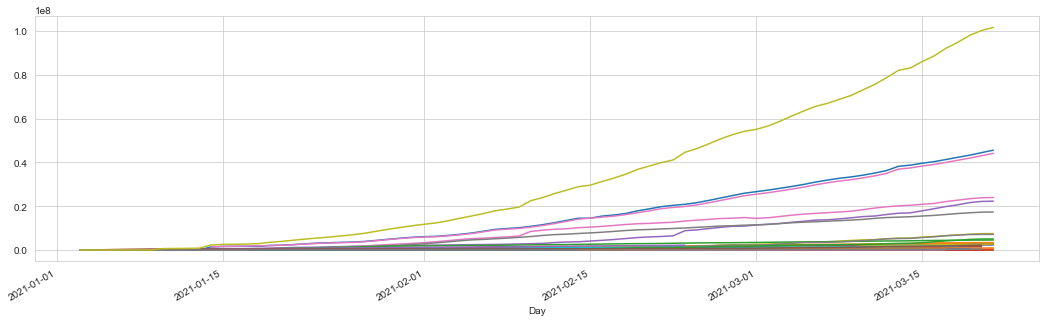

In [7]:
fig, ax = plt.subplots()
fully_vax_df.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, legend= False, figsize= (18,5))

In [8]:
attempt = fully_vax_df.copy()

In [9]:
attempt.head()

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980


In [10]:
attempt.sort_values(by= ['people_fully_vaccinated'], ascending= False, inplace= True)

In [11]:
attempt = attempt[attempt.Entity != 'World']

In [12]:
attempt.head(15)

,Entity,Code,Day,people_fully_vaccinated
2177,North America,NaN,2021-03-21,45571687
2176,North America,NaN,2021-03-20,44442434
3178,United States,USA,2021-03-21,44141228
2175,North America,NaN,2021-03-19,43286767
3177,United States,USA,2021-03-20,43036818
2174,North America,NaN,2021-03-18,42327205
3176,United States,USA,2021-03-19,41934629
2173,North America,NaN,2021-03-17,41308707
3175,United States,USA,2021-03-18,40981464
2172,North America,NaN,2021-03-16,40339714


In [13]:
attempt.Entity.unique()

array(['North America', 'United States', 'Europe', 'Asia',
       'European Union', 'India', 'South America', 'Turkey', 'Israel',
       'Brazil', 'Germany', 'Chile', 'Russia', 'Africa', 'Italy',
       'France', 'Morocco', 'Indonesia', 'United Kingdom',
       'United Arab Emirates', 'Spain', 'Poland', 'England', 'Serbia',
       'Romania', 'Mexico', 'Canada', 'Argentina', 'Netherlands',
       'Hungary', 'Greece', 'Portugal', 'Belgium', 'Switzerland',
       'Sweden', 'Czechia', 'Wales', 'Austria', 'Denmark', 'Norway',
       'Singapore', 'Slovakia', 'Bahrain', 'Scotland', 'Peru',
       'South Africa', 'Ireland', 'Lithuania', 'Slovenia', 'Finland',
       'Northern Ireland', 'Croatia', 'Bulgaria', 'Jordan', 'Costa Rica',
       'Estonia', 'Colombia', 'Lebanon', 'Malta', 'Kuwait', 'Cyprus',
       'Seychelles', 'Japan', 'Gibraltar', 'Ecuador', 'Kazakhstan',
       'Oman', 'Latvia', 'Bolivia', 'Luxembourg', 'Iceland',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'Belarus', 'Mona

In [14]:
continents = ['North America', 'Europe', 'Asia','European Union', 
              'Africa', 'South America', 'World']

In [15]:
attempt = attempt[~attempt['Entity'].isin(continents)]

In [16]:
attempt.Entity.unique()

array(['United States', 'India', 'Turkey', 'Israel', 'Brazil', 'Germany',
       'Chile', 'Russia', 'Italy', 'France', 'Morocco', 'Indonesia',
       'United Kingdom', 'United Arab Emirates', 'Spain', 'Poland',
       'England', 'Serbia', 'Romania', 'Mexico', 'Canada', 'Argentina',
       'Netherlands', 'Hungary', 'Greece', 'Portugal', 'Belgium',
       'Switzerland', 'Sweden', 'Czechia', 'Wales', 'Austria', 'Denmark',
       'Norway', 'Singapore', 'Slovakia', 'Bahrain', 'Scotland', 'Peru',
       'South Africa', 'Ireland', 'Lithuania', 'Slovenia', 'Finland',
       'Northern Ireland', 'Croatia', 'Bulgaria', 'Jordan', 'Costa Rica',
       'Estonia', 'Colombia', 'Lebanon', 'Malta', 'Kuwait', 'Cyprus',
       'Seychelles', 'Japan', 'Gibraltar', 'Ecuador', 'Kazakhstan',
       'Oman', 'Latvia', 'Bolivia', 'Luxembourg', 'Iceland',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'Belarus', 'Monaco',
       'Guernsey', 'Jersey', 'Faeroe Islands', 'Andorra', 'Greenland',
       'Equatorial

Entity
Albania                 AxesSubplot(0.125,0.2;0.775x0.68)
Andorra                 AxesSubplot(0.125,0.2;0.775x0.68)
Argentina               AxesSubplot(0.125,0.2;0.775x0.68)
Austria                 AxesSubplot(0.125,0.2;0.775x0.68)
Bahrain                 AxesSubplot(0.125,0.2;0.775x0.68)
                                      ...                
Ukraine                 AxesSubplot(0.125,0.2;0.775x0.68)
United Arab Emirates    AxesSubplot(0.125,0.2;0.775x0.68)
United Kingdom          AxesSubplot(0.125,0.2;0.775x0.68)
United States           AxesSubplot(0.125,0.2;0.775x0.68)
Wales                   AxesSubplot(0.125,0.2;0.775x0.68)
Length: 82, dtype: object

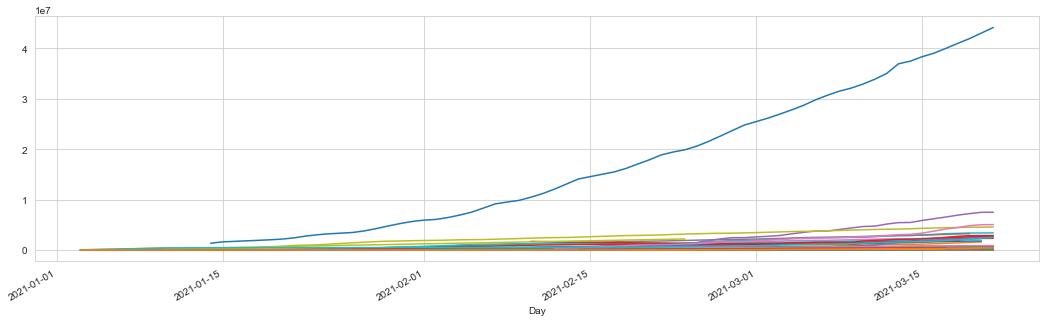

In [17]:
fig, ax = plt.subplots()
attempt.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (18,5), legend= False)


In [18]:
fully_vax_df = pd.read_csv('../data/people-fully-vaccinated-covid.csv')

In [19]:
country_incomes = pd.read_csv('../data/list-of-economies.csv', header= 4, index_col= False)
country_incomes

,Unnamed: 0,Economy,Code,Region,Income group,Lending category,Other
0,1.0,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
1,2.0,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
2,3.0,Algeria,DZA,Middle East & North Africa,Lower middle income,IBRD,NaN
3,4.0,American Samoa,ASM,East Asia & Pacific,Upper middle income,..,NaN
4,5.0,Andorra,AND,Europe & Central Asia,High income,..,NaN
...,...,...,...,...,...,...,...
261,42.0,Sub-Saharan Africa,SSF,NaN,NaN,NaN,NaN
262,43.0,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN,NaN
263,44.0,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN,NaN
264,45.0,Upper middle income,UMC,NaN,NaN,NaN,NaN


In [20]:
country_incomes.columns

Index(['Unnamed: 0', 'Economy', 'Code', 'Region', 'Income group',
       'Lending category', 'Other'],
      dtype='object')

In [21]:
country_incomes.isna().sum()

Unnamed: 0            2
Economy               2
Code                  2
Region               48
Income group         48
Lending category     48
Other               208
dtype: int64

In [22]:
country_incomes.drop(columns= ['Unnamed: 0', 'Other'], inplace= True)
country_incomes

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,South Asia,Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,Middle East & North Africa,Lower middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,..
4,Andorra,AND,Europe & Central Asia,High income,..
...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,NaN,NaN,NaN
262,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
263,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
264,Upper middle income,UMC,NaN,NaN,NaN


In [23]:
pd.set_option('display.max_rows', 50)

In [24]:
country_incomes.head(40)

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,South Asia,Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,Middle East & North Africa,Lower middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,..
4,Andorra,AND,Europe & Central Asia,High income,..
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,IBRD
8,Armenia,ARM,Europe & Central Asia,Upper middle income,IBRD
9,Aruba,ABW,Latin America & Caribbean,High income,..


In [25]:
ci2 = country_incomes.copy()

In [26]:
ci2 = ci2.iloc[:218]

In [27]:
ci2.tail(15)

,Economy,Code,Region,Income group,Lending category
203,Uganda,UGA,Sub-Saharan Africa,Low income,IDA
204,Ukraine,UKR,Europe & Central Asia,Lower middle income,IBRD
205,United Arab Emirates,ARE,Middle East & North Africa,High income,..
206,United Kingdom,GBR,Europe & Central Asia,High income,..
207,United States,USA,North America,High income,..
208,Uruguay,URY,Latin America & Caribbean,High income,IBRD
209,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,Blend
210,Vanuatu,VUT,East Asia & Pacific,Lower middle income,IDA
211,"Venezuela, RB",VEN,Latin America & Caribbean,Upper middle income,IBRD
212,Vietnam,VNM,East Asia & Pacific,Lower middle income,IBRD


In [28]:
ci2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Economy           218 non-null    object
 1   Code              218 non-null    object
 2   Region            218 non-null    object
 3   Income group      218 non-null    object
 4   Lending category  218 non-null    object
dtypes: object(5)
memory usage: 8.6+ KB


In [29]:
attempt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 3178 to 3042
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2839 non-null   object        
 1   Code                     2557 non-null   object        
 2   Day                      2839 non-null   datetime64[ns]
 3   people_fully_vaccinated  2839 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 110.9+ KB


## Merge dfs then segment by income to plot TS

In [37]:
test2_all = pd.merge(attempt, ci2, how= 'left', on= 'Code')

In [38]:
test2_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2838
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2839 non-null   object        
 1   Code                     2557 non-null   object        
 2   Day                      2839 non-null   datetime64[ns]
 3   people_fully_vaccinated  2839 non-null   int64         
 4   Economy                  2543 non-null   object        
 5   Region                   2543 non-null   object        
 6   Income group             2543 non-null   object        
 7   Lending category         2543 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 199.6+ KB


In [39]:
nullval = test2_all[test2_all.isnull().any(axis= 1)]

In [40]:
nullval.Entity.unique()

array(['England', 'Wales', 'Scotland', 'Northern Ireland', 'Guernsey',
       'Jersey', 'Montserrat'], dtype=object)

In [42]:
test2_all

,Entity,Code,Day,people_fully_vaccinated,Economy,Region,Income group,Lending category
0,United States,USA,2021-03-21,44141228,United States,North America,High income,..
1,United States,USA,2021-03-20,43036818,United States,North America,High income,..
2,United States,USA,2021-03-19,41934629,United States,North America,High income,..
3,United States,USA,2021-03-18,40981464,United States,North America,High income,..
4,United States,USA,2021-03-17,39989196,United States,North America,High income,..
...,...,...,...,...,...,...,...,...
2834,Ukraine,UKR,2021-03-17,1,Ukraine,Europe & Central Asia,Lower middle income,IBRD
2835,Faeroe Islands,FRO,2021-01-29,1,Faroe Islands,Europe & Central Asia,High income,..
2836,Albania,ALB,2021-02-02,1,Albania,Europe & Central Asia,Upper middle income,IBRD
2837,Ukraine,UKR,2021-03-20,1,Ukraine,Europe & Central Asia,Lower middle income,IBRD


In [44]:
test2_all['Income group'].fillna('High income', inplace= True)

In [45]:
test2_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2838
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2839 non-null   object        
 1   Code                     2557 non-null   object        
 2   Day                      2839 non-null   datetime64[ns]
 3   people_fully_vaccinated  2839 non-null   int64         
 4   Economy                  2543 non-null   object        
 5   Region                   2543 non-null   object        
 6   Income group             2839 non-null   object        
 7   Lending category         2543 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 199.6+ KB


In [86]:
test2_all.groupby(['Entity', 'Day'])['people_fully_vaccinated'].sum()

Entity   Day       
Albania  2021-02-02         1
         2021-02-09       438
         2021-02-17       611
         2021-02-18       611
         2021-02-22       655
                        ...  
Wales    2021-03-16    289185
         2021-03-17    304411
         2021-03-18    318976
         2021-03-19    329530
         2021-03-20    338959
Name: people_fully_vaccinated, Length: 2839, dtype: int64

Entity                Income group       
Albania               Upper middle income    AxesSubplot(0.125,0.125;0.775x0.755)
Andorra               High income            AxesSubplot(0.125,0.125;0.775x0.755)
Argentina             Upper middle income    AxesSubplot(0.125,0.125;0.775x0.755)
Austria               High income            AxesSubplot(0.125,0.125;0.775x0.755)
Bahrain               High income            AxesSubplot(0.125,0.125;0.775x0.755)
                                                             ...                 
Ukraine               Lower middle income    AxesSubplot(0.125,0.125;0.775x0.755)
United Arab Emirates  High income            AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom        High income            AxesSubplot(0.125,0.125;0.775x0.755)
United States         High income            AxesSubplot(0.125,0.125;0.775x0.755)
Wales                 High income            AxesSubplot(0.125,0.125;0.775x0.755)
Name: people_fully_vaccinated, Length: 82, dtype: object

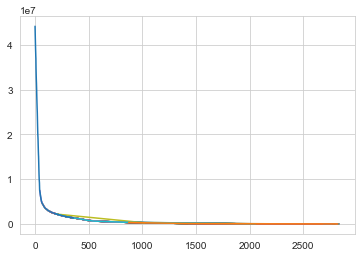

In [90]:
test2_all.groupby(['Entity', 'Income group'])['people_fully_vaccinated'].plot()

In [91]:
up_mid = test2_all[test2_all['Income group'] == 'Upper middle income']

In [92]:
up_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 60 to 2836
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   455 non-null    object        
 1   Code                     455 non-null    object        
 2   Day                      455 non-null    datetime64[ns]
 3   people_fully_vaccinated  455 non-null    int64         
 4   Economy                  455 non-null    object        
 5   Region                   455 non-null    object        
 6   Income group             455 non-null    object        
 7   Lending category         455 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 32.0+ KB


## Look at balance of income groups, which countries are in which group?

<AxesSubplot:xlabel='Income group', ylabel='count'>

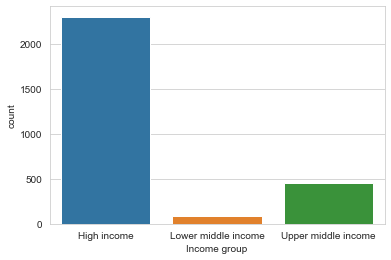

In [136]:
sns.countplot(x = 'Income group', data= test2_all)

## Percent of population data stuff

In [142]:
owid_df['pop_vax_percent'] = owid_df['people_fully_vaccinated'] / owid_df['population'] *100

In [156]:
owid_df.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
76406    2021-03-17
76407    2021-03-18
76408    2021-03-19
76409    2021-03-20
76410    2021-03-21
Name: date, Length: 76411, dtype: object

In [157]:
ow_date = owid_df[owid_df['date'] == '2021-03-20']

In [160]:
ow_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 390 to 76409
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               202 non-null    object 
 1   continent                              193 non-null    object 
 2   location                               202 non-null    object 
 3   date                                   202 non-null    object 
 4   total_cases                            199 non-null    float64
 5   new_cases                              199 non-null    float64
 6   new_cases_smoothed                     199 non-null    float64
 7   total_deaths                           189 non-null    float64
 8   new_deaths                             189 non-null    float64
 9   new_deaths_smoothed                    199 non-null    float64
 10  total_cases_per_million                198 non-null    float64
 11  ne

In [165]:
ow_perc = ow_date[ow_date['pop_vax_percent'].notna()]

In [170]:
ow_perc.location

793              Africa
3191          Argentina
4002               Asia
4814            Austria
5963            Bahrain
7517            Belgium
9074            Bolivia
10203            Brazil
10960          Bulgaria
12915            Canada
14499             Chile
15305          Colombia
17904            Cyprus
18294           Czechia
19073           Denmark
22478           Estonia
23649            Europe
24073    European Union
24973           Finland
25396            France
27393         Gibraltar
27787            Greece
30971           Hungary
31778             India
32163         Indonesia
34205            Israel
34621             Italy
38894           Lebanon
40732         Lithuania
43464             Malta
44797            Mexico
46370        Montenegro
46810           Morocco
50658     North America
55396            Poland
55782          Portugal
56559           Romania
56975            Russia
60523            Serbia
62057          Slovakia
62471          Slovenia
63806     South 

In [173]:
ow_perc[ow_perc['location'] == 'World']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,pop_vax_percent
75327,OWID_WRL,NaN,World,2021-03-20,122813796.0,498140.0,471249.143,2709640.0,8194.0,8716.286,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,1.285957


location
Afghanistan    AxesSubplot(0.125,0.125;0.775x0.755)
Africa         AxesSubplot(0.125,0.125;0.775x0.755)
Albania        AxesSubplot(0.125,0.125;0.775x0.755)
Algeria        AxesSubplot(0.125,0.125;0.775x0.755)
Andorra        AxesSubplot(0.125,0.125;0.775x0.755)
                               ...                 
Vietnam        AxesSubplot(0.125,0.125;0.775x0.755)
World          AxesSubplot(0.125,0.125;0.775x0.755)
Yemen          AxesSubplot(0.125,0.125;0.775x0.755)
Zambia         AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe       AxesSubplot(0.125,0.125;0.775x0.755)
Name: pop_vax_percent, Length: 202, dtype: object

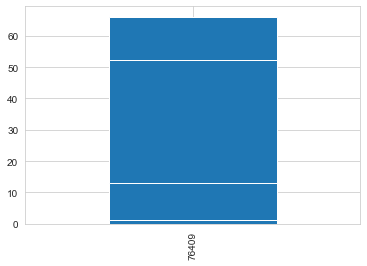

In [162]:
ow_date.groupby('location')['pop_vax_percent'].plot(kind= 'bar')

# Excess / Notes:

In [41]:
attempt = attempt[attempt.Entity != ['North America', 'Europe', 'Asia','European Union', 'Africa']]
attempt = attempt[attempt.Entity != 'World']

ValueError: ('Lengths must match to compare', (2839,), (5,))

In [ ]:
attempt = attempt.query('Entity' != ['North America', 'South America', 'Europe', 'Asia','European Union', 'Africa'])

In [ ]:
desired = [i for i in attempt.Entity if i not in continents]

In [ ]:
desired

In [30]:
test_all = pd.merge(attempt, ci2, left_on = 'Entity', right_on= 'Economy', copy= True)

In [31]:
testing_all = pd.merge(attempt, ci2, how= 'left', left_on = 'Entity', right_on= 'Economy')

In [32]:
testing_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2838
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2839 non-null   object        
 1   Code_x                   2557 non-null   object        
 2   Day                      2839 non-null   datetime64[ns]
 3   people_fully_vaccinated  2839 non-null   int64         
 4   Economy                  2379 non-null   object        
 5   Code_y                   2379 non-null   object        
 6   Region                   2379 non-null   object        
 7   Income group             2379 non-null   object        
 8   Lending category         2379 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 221.8+ KB


In [33]:
testing_all[testing_all.isnull().any(axis=1)]

,Entity,Code_x,Day,people_fully_vaccinated,Economy,Code_y,Region,Income group,Lending category
140,Russia,RUS,2021-03-21,2751436,NaN,NaN,NaN,NaN,NaN
143,Russia,RUS,2021-03-20,2710605,NaN,NaN,NaN,NaN,NaN
149,Russia,RUS,2021-03-19,2641167,NaN,NaN,NaN,NaN,NaN
162,Russia,RUS,2021-03-18,2478390,NaN,NaN,NaN,NaN,NaN
169,Russia,RUS,2021-03-17,2438650,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2809,Wales,NaN,2021-01-10,79,NaN,NaN,NaN,NaN,NaN
2813,Scotland,NaN,2021-01-03,44,NaN,NaN,NaN,NaN,NaN
2814,Montserrat,MSR,2021-03-10,40,NaN,NaN,NaN,NaN,NaN
2820,Wales,NaN,2021-01-03,27,NaN,NaN,NaN,NaN,NaN
